In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set pandas settings to show all data when using .head(), .columns etc.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [64]:
# (En cas de ré-import d'un nouveau fichier plus complet)

# Import brut du fichier csv + validation de la variable ACN comme identifiant unique et non Nan
df=pd.read_csv('ASRS_10y_data.csv')
print(df['ACN'].duplicated().sum(),' doublon pour la variable ACN') 
print(df['ACN'].isnull().sum(axis = 0) , 'valeurs NaN pour la variable ACN')
print ('Validation 0 doublon / 0 Nan pour la variable ACN => identifiant')

0  doublon pour la variable ACN
0 valeurs NaN pour la variable ACN
Validation 0 doublon / 0 Nan pour la variable ACN => identifiant


In [65]:
# Import du fichier csv , avec la variable ACN comme identifiant
df=pd.read_csv('ASRS_10y_data.csv',index_col=0)

In [66]:
df.head()

,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Latitude / Longitude (UAS),Flight Conditions,Weather Elements / Visibility,Work Environment Factor,Light,Ceiling,RVR.Single Value,ATC / Advisory,Aircraft Operator,Make Model Name,Aircraft Zone,Crew Size,Operating Under FAR Part,Flight Plan,Mission,Nav In Use,Flight Phase,Route In Use,Airspace,Maintenance Status.Maintenance Deferred,Maintenance Status.Records Complete,Maintenance Status.Released For Service,Maintenance Status.Required / Correct Doc On Board,Maintenance Status.Maintenance Type,Maintenance Status.Maintenance Items Involved,Cabin Lighting,Number Of Seats.Number,Passengers On Board.Number,Crew Size Flight Attendant.Number Of Crew,Airspace Authorization Provider (UAS),Operating Under Waivers / Exemptions / Authorizations (UAS),Waivers / Exemptions / Authorizations (UAS),Airworthiness Certification (UAS),Weight Category (UAS),Configuration (UAS),Flight Operated As (UAS),Flight Operated with Visual Observer (UAS),Control Mode (UAS),Flying In / Near / Over (UAS),Passenger Capable (UAS),Type (UAS),Number of UAS Being Controlled (UAS),Aircraft Component,Manufacturer,Aircraft Reference,Problem,ATC / Advisory.1,Aircraft Operator.1,Make Model Name.1,Aircraft Zone.1,Crew Size.1,Operating Under FAR Part.1,Flight Plan.1,Mission.1,Nav In Use.1,Flight Phase.1,Route In Use.1,Airspace.1,Maintenance Status.Maintenance Deferred.1,Maintenance Status.Records Complete.1,Maintenance Status.Released For Service.1,Maintenance Status.Required / Correct Doc On Board.1,Maintenance Status.Maintenance Type.1,Maintenance Status.Maintenance Items Involved.1,Cabin Lighting.1,Number Of Seats.Number.1,Passengers On Board.Number.1,Crew Size Flight Attendant.Number Of Crew.1,Airspace Authorization Provider (UAS).1,Operating Under Waivers / Exemptions / Authorizations (UAS).1,Waivers / Exemptions / Authorizations (UAS).1,Airworthiness Certification (UAS).1,Weight Category (UAS).1,Configuration (UAS).1,Flight Operated As (UAS).1,Flight Operated with Visual Observer (UAS).1,Control Mode (UAS).1,Flying In / Near / Over (UAS).1,Passenger Capable (UAS).1,Type (UAS).1,Number of UAS Being Controlled (UAS).1,Location Of Person,Location In Aircraft,Reporter Organization,Function,Qualification,Experience,Cabin Activity,Human Factors,Communication Breakdown,UAS Communication Breakdown,ASRS Report Number.Accession Number,Location Of Person.1,Location In Aircraft.1,Reporter Organization.1,Function.1,Qualification.1,Experience.1,Cabin Activity.1,Human Factors.1,Communication Breakdown.1,UAS Communication Breakdown.1,ASRS Report Number.Accession Number.1,Anomaly,Miss Distance,Were Passengers Involved In Event,Detector,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative.1,Callback.1,Synopsis,Unnamed: 125
ACN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
986560,201201,1801-2400,A11.TRACON,AK,NaN,NaN,NaN,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRACON A11,Air Taxi,Super King Air 200,NaN,1.0,Part 135,IFR,Passenger,NaN,Descent,Vectors,Class E ANC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Facility A11.TRACON,NaN,Government,Departure; Approach,Air Traffic Control Developmental,NaN,NaN,Situational Awareness,NaN,NaN,986560,NaN,Flight Deck,Air Taxi,Captain; Pilot Flying,NaN,Flight Crew Last 90 Days 46; Flight Crew Total...,NaN,NaN,NaN,NaN,986993.0,Deviation - Altitude Excursion From Assigned A...,NaN,NaN,Person Air Traffic Control,NaN,Air Traffic Control Issued New Clearance,Human Factors,Human Factors,A BE20 was inbound to ANC via YESKA. He was to...,NaN,I was descending to 8

In [67]:
df.info()  
# 24063 entries (10/05/2022)
# Int64Index: 24063 entries, 986560 to 1874638
# Columns: 125 entries, Date to Unnamed: 125
# dtypes: float64(29), int64(2), object(94)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24063 entries, 986560 to 1874638
Columns: 125 entries, Date to Unnamed: 125
dtypes: float64(29), int64(2), object(94)
memory usage: 23.1+ MB


In [70]:
# Comptage des Nan pour chaque variable : des taux de complétion très variés
# => Quelles variables garder dans l'analyse ?
df.isnull().sum(axis = 0) 

# => Faire une dataviz avec le taux de complétion des données ??

Date                                                                 0
Local Time Of Day                                                 1224
Locale Reference                                                     3
State Reference                                                      0
Relative Position.Angle.Radial                                   22928
Relative Position.Distance.Nautical Miles                        21842
Altitude.AGL.Single Value                                        16904
Altitude.MSL.Single Value                                        10844
Latitude / Longitude (UAS)                                       24063
Flight Conditions                                                 8996
Weather Elements / Visibility                                    17880
Work Environment Factor                                          23926
Light                                                             8877
Ceiling                                                          20538
RVR.Si

In [74]:
# Création du DF df_NotNull  = df sans les colonnes vides. 
df_NotNull = df.dropna(axis = 1, how = 'all')  # Supprime les colonnes vides 
df_NotNull.info()  
# Int64Index: 24063 entries, 986560 to 1874638
# Columns: 106 entries, Date to Synopsis        => 19 colonnes complètement vides
# dtypes: float64(10), int64(2), object(94)
# memory usage: 19.6+ MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24063 entries, 986560 to 1874638
Columns: 106 entries, Date to Synopsis
dtypes: float64(10), int64(2), object(94)
memory usage: 19.6+ MB


In [73]:
# Description des variables "quanti" , y compris celles vides
df_NotNull.describe().T

# => Date et Crew Size , bonnes candidates pour une analyse quanti / dataviz car assez complètes

,count,mean,std,min,25%,50%,75%,max
Date,24063.0,2.016292e+05,260.751817,201201.0,201409.0,201607.0,201810.0,2.022010e+05
Relative Position.Angle.Radial,1135.0,1.844358e+02,107.787666,0.0,90.0,185.0,270.0,3.605555e+02
Relative Position.Distance.Nautical Miles,2221.0,1.634214e+01,100.246862,0.0,3.0,5.0,10.0,2.500000e+03
Altitude.AGL.Single Value,7159.0,2.353155e+02,1081.503921,0.0,0.0,0.0,50.0,4.500000e+04
Altitude.MSL.Single Value,13219.0,1.114644e+04,12133.862834,0.0,2700.0,6000.0,15000.0,3.400000e+05
Crew Size,22018.0,1.852076e+00,0.496671,1.0,2.0,2.0,2.0,5.000000e+00
Number Of Seats.Number,19.0,1.792105e+02,87.475444,6.0,139.0,187.0,242.5,3.100000e+02
Passengers On Board.Number,31.0,7.880645e+01,87.948629,0.0,1.5,34.0,155.0,2.880000e+02
Crew Size Flight Attendant.Number Of Crew,30.0,6.733333e+00,4.660423,1.0,4.0,4.0,8.0,2.000000e+01
Crew Size.1,4431.0,1.663733e+00,0.518933,0.0,1.0,2.0,2.0,5.000000e+00


In [52]:
# Sortie CSV du descriptif des variables quanti, y compris les NULL à des finsde constitution du dico Excel
df_describe=pd.DataFrame(df.describe().T)
df_describe.to_csv('ASRS_10y_data_describe.csv', index = True)

In [103]:
# DF des données catégorielles, non textuelles, non vides uniquement
df_cat_data=df_NotNull.select_dtypes(include='O').drop(['Narrative','Narrative.1','Callback','Callback.1','Synopsis'], axis = 1)  # ou cat_data=df.select_dtypes(include='object')

In [122]:
nb_null=0
nb_entries=len(df_cat_data)
for col in df_cat_data.columns :
    print("\n")
    print("VARIABLE : ",col, )
    nb_null=df_cat_data[col].isnull().sum(axis = 0)
    print('VALEURS NaN : ',nb_null , '   (',round(nb_null/nb_entries*100,2),'%)    /      VALEURS NON VIDES : ',nb_entries-nb_null ,'  (',round((nb_entries-nb_null)/nb_entries*100,2),'%)')
    S=df_cat_data[col].value_counts(dropna=False, normalize=False).head(20)
    print('TOP ',len(S) ,'VALEURS',S.sum(), '   (',round(S.sum()/nb_entries*100,2),'%)' )
    print(S)    
    
# Certaines variables sont à parser (à lister) avant le value_counts comme 'Weather Elements / Visibility' (cf cellule suivante)



VARIABLE :  Local Time Of Day
VALEURS NaN :  1224    ( 5.09 %)    /      VALEURS NON VIDES :  22839   ( 94.91 %)
TOP  6 VALEURS 24063    ( 100.0 %)
1201-1800    8420
0601-1200    6009
1801-2400    5635
0001-0600    2762
NaN          1224
ZZZ            13
Name: Local Time Of Day, dtype: int64


VARIABLE :  Locale Reference
VALEURS NaN :  3    ( 0.01 %)    /      VALEURS NON VIDES :  24060   ( 99.99 %)
TOP  20 VALEURS 7100    ( 29.51 %)
ZZZZ.Airport    1134
LAX.Airport      477
ORD.Airport      448
DEN.Airport      440
ZZZZ.ARTCC       422
SFO.Airport      419
EWR.Airport      369
SCT.TRACON       323
ATL.Airport      312
LAS.Airport      281
ZLA.ARTCC        280
DFW.Airport      279
ZDC.ARTCC        268
ZDV.ARTCC        265
IAH.Airport      263
LGA.Airport      260
CLT.Airport      244
TEB.Airport      217
NCT.TRACON       205
ZJX.ARTCC        194
Name: Locale Reference, dtype: int64


VARIABLE :  State Reference
VALEURS NaN :  0    ( 0.0 %)    /      VALEURS NON VIDES :  24063   ( 1

TOP  3 VALEURS 24063    ( 100.0 %)
NaN    24049
N         11
Y          3
Name: Operating Under Waivers / Exemptions / Authorizations (UAS), dtype: int64


VARIABLE :  Waivers / Exemptions / Authorizations (UAS)
VALEURS NaN :  24061    ( 99.99 %)    /      VALEURS NON VIDES :  2   ( 0.01 %)
TOP  3 VALEURS 24063    ( 100.0 %)
NaN              24061
Emergency COA        1
Blanket COA          1
Name: Waivers / Exemptions / Authorizations (UAS), dtype: int64


VARIABLE :  Airworthiness Certification (UAS)
VALEURS NaN :  24062    ( 100.0 %)    /      VALEURS NON VIDES :  1   ( 0.0 %)
TOP  2 VALEURS 24063    ( 100.0 %)
NaN         24062
Standard        1
Name: Airworthiness Certification (UAS), dtype: int64


VARIABLE :  Weight Category (UAS)
VALEURS NaN :  24045    ( 99.93 %)    /      VALEURS NON VIDES :  18   ( 0.07 %)
TOP  4 VALEURS 24063    ( 100.0 %)
NaN      24045
Small       15
Micro        2
Large        1
Name: Weight Category (UAS), dtype: int64


VARIABLE :  Configuration (UAS)


VALEURS NaN :  24062    ( 100.0 %)    /      VALEURS NON VIDES :  1   ( 0.0 %)
TOP  2 VALEURS 24063    ( 100.0 %)
NaN                      24062
Scheduled Maintenance        1
Name: Maintenance Status.Maintenance Type.1, dtype: int64


VARIABLE :  Maintenance Status.Maintenance Items Involved.1
VALEURS NaN :  24062    ( 100.0 %)    /      VALEURS NON VIDES :  1   ( 0.0 %)
TOP  2 VALEURS 24063    ( 100.0 %)
NaN                   24062
Repair; Inspection        1
Name: Maintenance Status.Maintenance Items Involved.1, dtype: int64


VARIABLE :  Operating Under Waivers / Exemptions / Authorizations (UAS).1
VALEURS NaN :  24062    ( 100.0 %)    /      VALEURS NON VIDES :  1   ( 0.0 %)
TOP  2 VALEURS 24063    ( 100.0 %)
NaN    24062
N          1
Name: Operating Under Waivers / Exemptions / Authorizations (UAS).1, dtype: int64


VARIABLE :  Waivers / Exemptions / Authorizations (UAS).1
VALEURS NaN :  24061    ( 99.99 %)    /      VALEURS NON VIDES :  2   ( 0.01 %)
TOP  2 VALEURS 24063    ( 10

VALEURS NaN :  21534    ( 89.49 %)    /      VALEURS NON VIDES :  2529   ( 10.51 %)
TOP  20 VALEURS 21747    ( 90.38 %)
NaN                                                      21534
Air Traffic Control Time Certified In Pos 1 (yrs) 1         24
Air Traffic Control Time Certified In Pos 1 (yrs) 3         20
Air Traffic Control Time Certified In Pos 1 (yrs) 2         19
Air Traffic Control Time Certified In Pos 1 (yrs) 4         17
Air Traffic Control Time Certified In Pos 1 (yrs) 6         17
Air Traffic Control Time Certified In Pos 1 (yrs) 7         15
Air Traffic Control Time Certified In Pos 1 (yrs) 5         15
Air Traffic Control Time Certified In Pos 1 (yrs) 8          9
Flight Crew Total 15000                                      9
Air Traffic Control Time Certified In Pos 1 (yrs) 9          8
Air Traffic Control Time Certified In Pos 1 (yrs) 0          7
Air Traffic Control Time Certified In Pos 1 (yrs) 2.5        7
Air Traffic Control Time Certified In Pos 1 (yrs) 1.5        

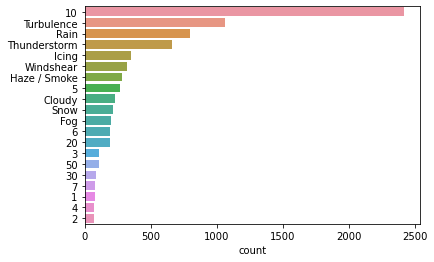

In [123]:
# Parsing de la colonne 'Weather Elements / Visibility' et top 20 des modalités
WeatherElements=df['Weather Elements / Visibility'].str.split('; ', expand=True).stack().reset_index(drop=True)
sns.countplot(y=WeatherElements, order=WeatherElements.value_counts().iloc[:20].index);